In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt


In [5]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train = x_train.reshape((-3, 32, 32, 3))
x_test = x_test.reshape((-3, 32, 32, 3))


y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)




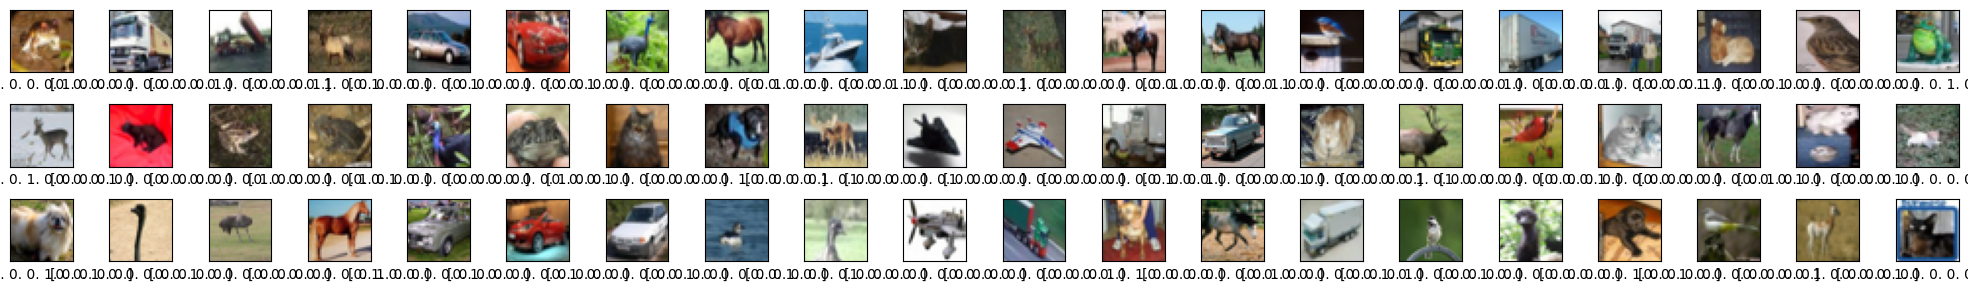

In [6]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [7]:
def build_model():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same', input_shape=(32, 32, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same', kernel_regularizer=l2(0.001)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

model = build_model()


In [8]:
# Compile the model with SGD optimizer
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

# Compile the model with Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

# Compile the model with RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


In [9]:
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)
history_adam = model_adam.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

# Evaluate the models on the test set
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)


Epoch 1/10
547/547 [==============================] - 18s 9ms/step - loss: 2.3263 - accuracy: 0.1975 - val_loss: 2.1433 - val_accuracy: 0.2755
Epoch 2/10
547/547 [==============================] - 4s 6ms/step - loss: 2.0581 - accuracy: 0.3091 - val_loss: 1.9692 - val_accuracy: 0.3427
Epoch 3/10
547/547 [==============================] - 4s 7ms/step - loss: 1.8915 - accuracy: 0.3717 - val_loss: 1.8151 - val_accuracy: 0.4031
Epoch 4/10
547/547 [==============================] - 3s 6ms/step - loss: 1.7583 - accuracy: 0.4203 - val_loss: 1.7413 - val_accuracy: 0.4229
Epoch 5/10
547/547 [==============================] - 3s 6ms/step - loss: 1.6498 - accuracy: 0.4566 - val_loss: 1.6693 - val_accuracy: 0.4491
Epoch 6/10
547/547 [==============================] - 4s 7ms/step - loss: 1.5780 - accuracy: 0.4833 - val_loss: 1.5893 - val_accuracy: 0.4761
Epoch 7/10
547/547 [==============================] - 3s 6ms/step - loss: 1.5194 - accuracy: 0.5031 - val_loss: 1.5355 - val_accuracy: 0.5026
Epoch

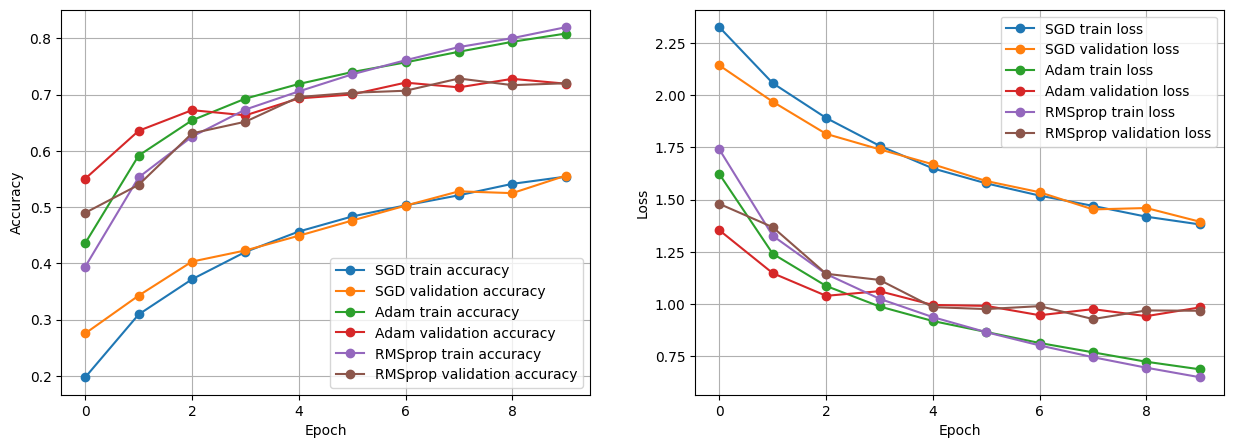

In [10]:
plt.figure(figsize=(15,5))

# accuracy plot
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Accuracy for Adam Optimizer was better with 71.46% Accuracy